# Analysis of teams

This notebook contains analyses of teams that participated at the **`Copa America 2021`**. The analyses included are: `Goal contribution`, `Goal scoring`, `Progressive actions`, `Defensive actions`, and others. Inspiration is primarly taken from [@TalkingUnited](https://twitter.com/TalkingUnited).

## Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import matplotlib.patheffects as path_effects
import seaborn as sns

from highlight_text import htext
from matplotlib.offsetbox import OffsetImage,AnchoredOffsetbox
from mplsoccer import Pitch, VerticalPitch
from PIL import Image

In [2]:
pd.set_option('display.max_columns', 100)

## Set constants

In [3]:
countries = ['argentina', 'bolivia', 'brazil', 'colombia', 'chile', 'ecuador', 'paraguay', 'peru', 
             'uruguay', 'venezuela']

## 1. Goal contribution

This analysis is inspired in [@AnalysisMUFC](https://twitter.com/AnalysisMUFC) who published the analysis [here](https://twitter.com/AnalysisMUFC/status/1470815092170231809). It involves data about `npxG` and `xA`.

### Load data

In [139]:
analysis_df = pd.DataFrame()
for country in countries:
    if analysis_df.size > 0:
        aux_analysis_df = pd.read_csv(f"data/{country}_standard.csv")
        aux_analysis_df['country'] = country
        analysis_df = analysis_df.append(aux_analysis_df, ignore_index=True, sort=False)
    else:
        analysis_df = pd.read_csv(f"data/{country}_standard.csv")
        analysis_df['country'] = country        

### Check data

In [140]:
print(f"The dataset contains {analysis_df.shape[0]} rows and {analysis_df.shape[1]} columns")

The dataset contains 292 rows and 30 columns


In [141]:
analysis_df.head()

,player,pos,age,playingtime_mp,playingtime_starts,playingtime_min,playingtime_90s,performance_gls,performance_ast,performance_g-pk,performance_pk,performance_pkatt,performance_crdy,performance_crdr,per90minutes_gls,per90minutes_ast,per90minutes_g+a,per90minutes_g-pk,per90minutes_g+a-pk,expected_xg,expected_npxg,expected_xa,expected_npxg+xa,per90minutes_xg,per90minutes_xa,per90minutes_xg+xa,per90minutes_npxg,per90minutes_npxg+xa,matches,country
0,Lionel Messi,"FW,MF",33.0,7,7,660.0,7.3,4.0,5.0,3.0,1.0,1.0,0.0,0.0,0.55,0.68,1.23,0.41,1.09,2.8,2.0,2.9,4.9,0.38,0.40,0.78,0.27,0.67,Matches,argentina
1,Emiliano Martínez,GK,28.0,6,6,570.0,6.3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches,argentina
2,Rodrigo De Paul,MF,26.0,6,5,498.0,5.5,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.18,0.18,0.36,0.18,0.36,1.0,1.0,0.8,1.8,0.17,0.15,0.32,0.17,0.32,Matches,argentina
3,Nicolás Otamendi,DF,32.0,5,5,480.0,5.3,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches,argentina
4,Lautaro Martínez,FW,23.0,6,5,445.0,4.9,3.0,0.0,3.0,0.0,0.0,1.0,0.0,0.61,0.00,0.61,0.61,0.61,4.5,4.5,0.0,4.6,0.92,0.01,0.92,0.92,0.92,Matches,argentina


### Filter data

**Remove goalkeepers**

In [142]:
analysis_df = analysis_df[analysis_df['pos'] != 'GK']

In [143]:
print(f"After removing GKs the dataset contains {analysis_df.shape[0]} players")

After removing GKs the dataset contains 261 players


**Remove players who play less than 50% of the team's played minutes**

In [144]:
min_teams_played = analysis_df.loc[analysis_df['player']=='Squad Total', ['country', 'playingtime_90s']]

In [145]:
analysis_fdf = pd.DataFrame()
for country in countries:
    team = analysis_df[analysis_df['country']==country]
    min_team_played = min_teams_played.loc[min_teams_played['country']==country, 'playingtime_90s'].values[0]
    if analysis_fdf.size > 0:
        analysis_fdf = analysis_fdf.append(team[team['playingtime_90s'] >= (min_team_played/2)], ignore_index=True, 
                                           sort=False)
    else:
        analysis_fdf = team[team['playingtime_90s'] >= (min_team_played/2)]

**Remove summary rows**

In [146]:
analysis_fdf = analysis_fdf[analysis_fdf['player']!='Squad Total']

In [147]:
analysis_fdf = analysis_fdf[analysis_fdf['player']!='Opponent Total']

**Select columns**

In [148]:
analysis_fdf = analysis_fdf[['player','pos', 'country', 'per90minutes_xa', 'per90minutes_npxg']]

In [149]:
analysis_fdf.head()

,player,pos,country,per90minutes_xa,per90minutes_npxg
0,Lionel Messi,"FW,MF",argentina,0.40,0.27
1,Rodrigo De Paul,MF,argentina,0.15,0.17
2,Nicolás Otamendi,DF,argentina,0.00,0.00
3,Lautaro Martínez,FW,argentina,0.01,0.92
4,Giovani Lo Celso,MF,argentina,0.29,0.01


In [210]:
analysis_fdf[analysis_fdf['country']=='venezuela']

,player,pos,country,per90minutes_xa,per90minutes_npxg
105,Luis Mago,DF,venezuela,0.01,0.04
106,Junior Moreno,MF,venezuela,0.00,0.00
107,Cristian Cásseres Jr.,"FW,MF",venezuela,0.06,0.07
108,Alexander González,DF,venezuela,0.02,0.01
109,José Andrés Martínez,"FW,MF",venezuela,0.21,0.00
110,Adrián Martínez,DF,venezuela,0.00,0.10
111,Yohan Cumana,DF,venezuela,0.00,0.01
112,Fernando Aristeguieta,FW,venezuela,0.01,0.02
113,Francisco La Mantía,DF,venezuela,0.00,0.00


### Draw scatterplots

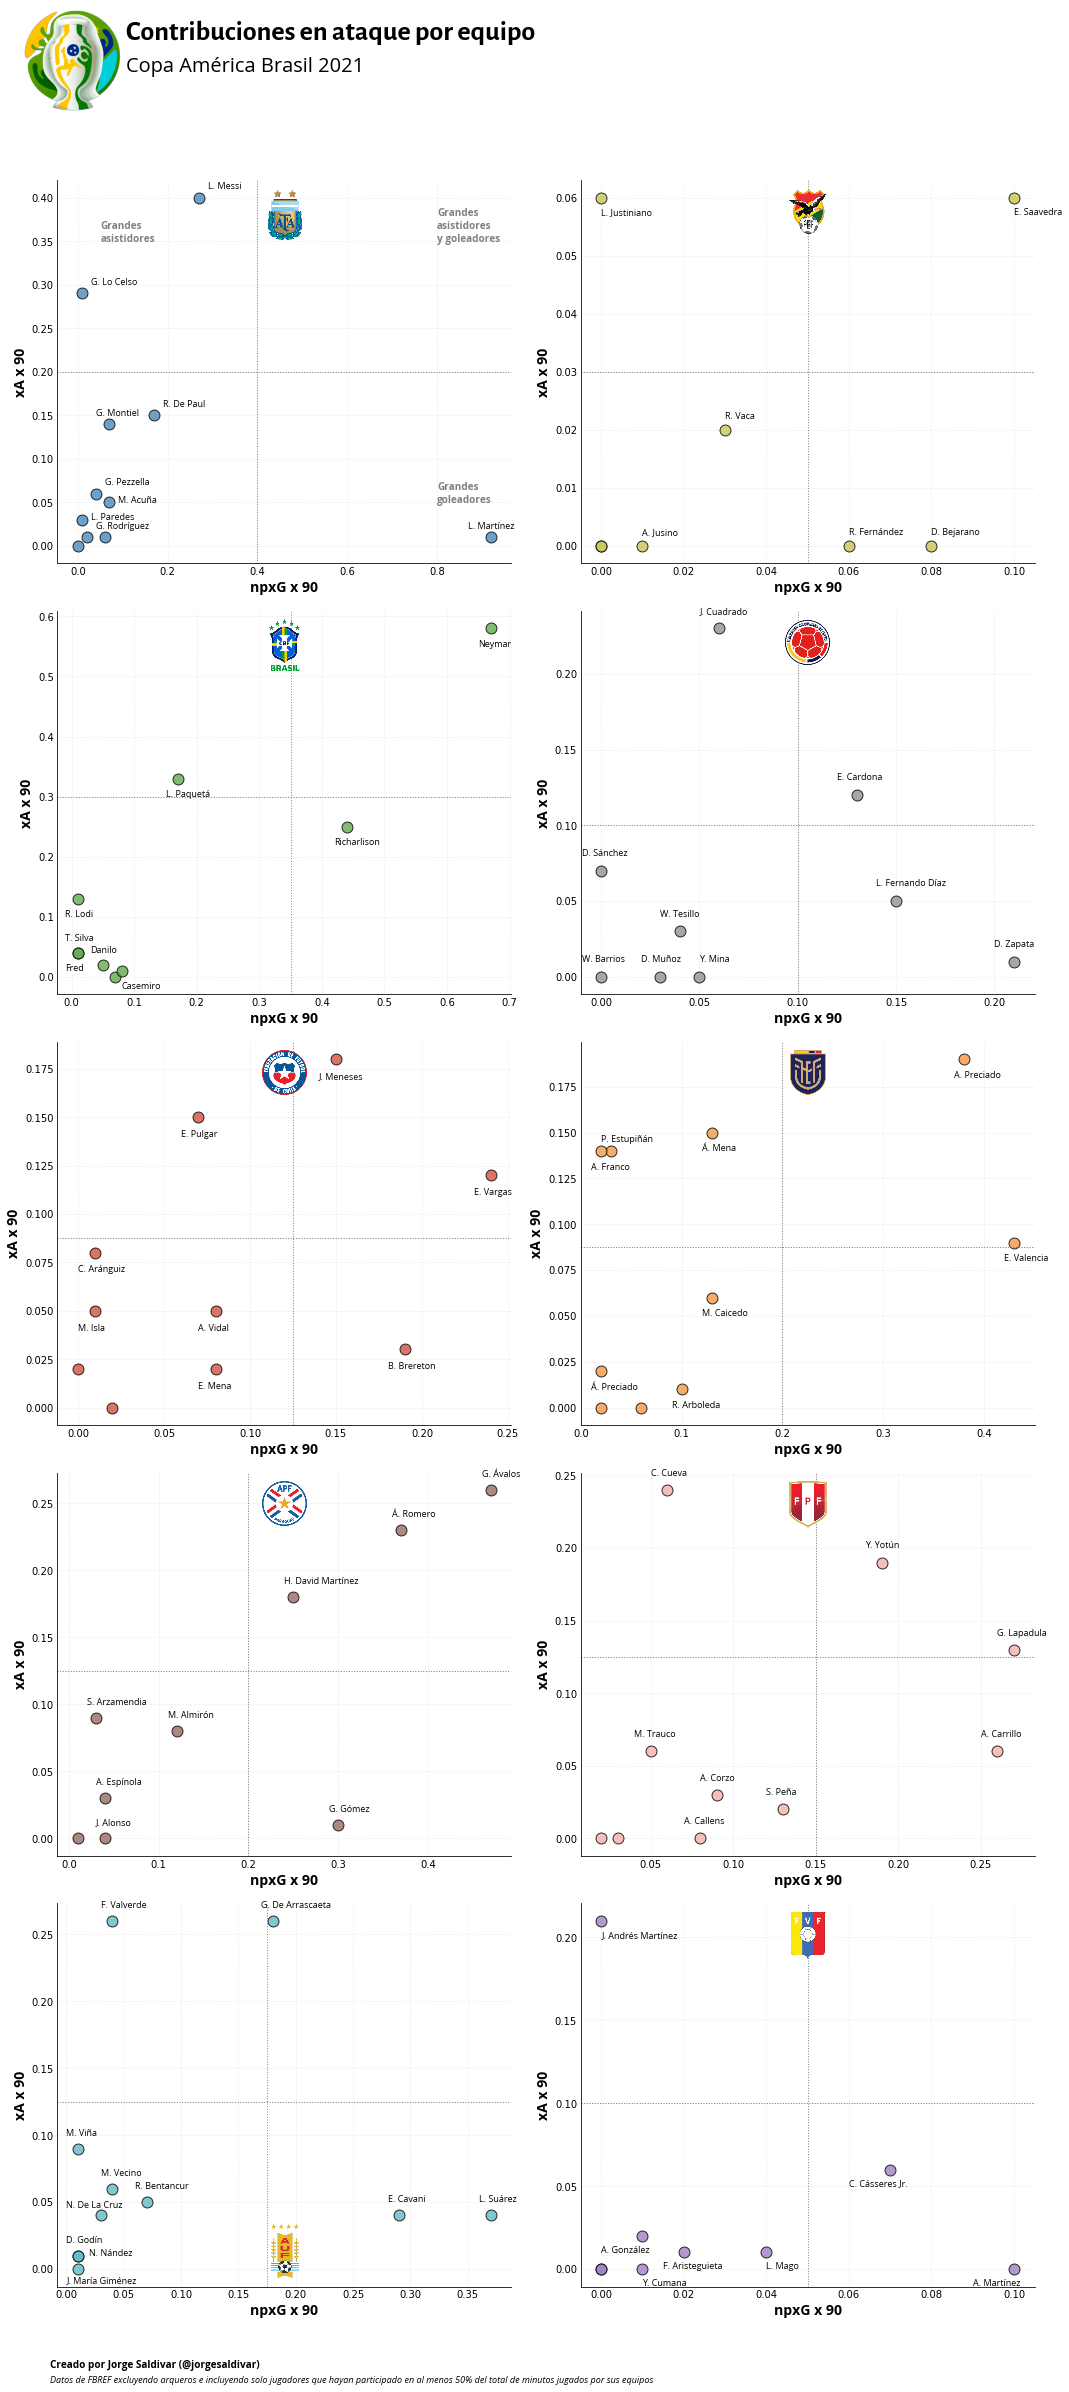

In [219]:
title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "black"
background = "white"
filler = "grey"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15,30))
fig.set_facecolor(background)

colors = {'argentina':'#4A8ABD', 'bolivia':'#C8C656', 'brazil':'#61AA4F', 'colombia':'#919191' , 
          'chile':'#D25041', 'ecuador': '#F49845', 'paraguay': '#976C60', 'peru': '#F3B0AB', 'uruguay': '#60B9C7',
          'venezuela': '#9F81C5'}

idx = 0    
for i in range(0,5):
    for j in range(0,2):
        # set figure's params
        axs[i][j].patch.set_alpha(0)
        axs[i][j].grid(ls="dotted",lw="0.5",color="lightgrey", zorder=1)
        axs[i][j].tick_params(axis="both",length=0)
        spines = ["top","right", "bottom", "left"]
        for s in spines:
            if s in ["top","right"]:
                axs[i][j].spines[s].set_visible(False)
            else:
                axs[i][j].spines[s].set_color(text_color)
        team = analysis_fdf[analysis_fdf['country']==countries[idx]]
        x = team['per90minutes_npxg'].values
        y = team['per90minutes_xa'].values
        axs[i][j].scatter(x, y, s=120, color=colors[countries[idx]], alpha=0.8, lw=1, zorder=2, edgecolor='black')
        
        # add horizontal line
        axs[i][j].axhline(y=np.median(axs[i][j].get_yticks()), color='gray', linestyle='dotted', lw=1)
        # add vertical line
        axs[i][j].axvline(x=np.median(axs[i][j].get_xticks()), color='gray', linestyle='dotted', lw=1)
        
        # add players' names
        x_25 = team['per90minutes_npxg'].describe()['25%']
        y_25 = team['per90minutes_xa'].describe()['25%']
        for k, player_name in enumerate(team['player']):
            if y[k] < y_25 and x[k] < x_25:
                    continue
            if countries[idx] == 'argentina':
                if 'Tagliafico' in player_name:
                    continue
                elif 'Montiel' in player_name:
                    delta_x = -0.03
                    delta_y = 0.01
                elif 'Paredes' in player_name or 'Acuña' in player_name:
                    delta_y = 0
                elif 'Lautaro' in player_name:
                    delta_x = -0.05
                else:
                    delta_x = 0.02
                    delta_y = 0.01
            elif countries[idx] == 'bolivia':
                if 'Quinteros' in player_name or 'Álvarez' in player_name:
                    continue
                elif 'Justiniano' in player_name or 'Saavedra' in player_name:
                    delta_y = -0.003
                    delta_x = 0
                else:
                    delta_x = 0
                    delta_y = 0.002
            elif countries[idx] == 'brazil':
                if 'Danilo' in player_name or 'Silva' in player_name:
                    delta_y = 0.02
                    delta_x = -0.02
                elif 'Casemiro' in player_name:
                    delta_x = 0
                    delta_y = -0.03
                else:
                    delta_x = -0.02
                    delta_y = -0.03
            elif countries[idx] == 'colombia':
                delta_x = -0.01
                delta_y = 0.01
                if 'Mina' in player_name:
                    delta_x = 0
            elif countries[idx] in ['ecuador', 'chile']:
                delta_y = -0.01
                if 'Estupiñán' in player_name:
                    delta_y = 0.005
            elif countries[idx] == 'uruguay':
                delta_x = -0.01
                delta_y = 0.01
                if 'Giménez' in player_name:
                    delta_y = -0.01
                if 'Nández' in player_name:
                    delta_x = 0.01
                    delta_y = 0
                if 'Nicolás' in player_name:
                    delta_x = -0.03
                    delta_y = 0.006
            elif countries[idx] == 'venezuela':
                delta_x = -0.01
                delta_y = -0.01
                if 'Andrés' in player_name:
                    delta_x = 0
                if 'Aristeguieta' in player_name:
                    delta_x = -0.005
                if 'Mago' in player_name or 'Cumana' in player_name:
                    delta_x = 0
            else:
                delta_x = -0.01
                delta_y = 0.01
            f_player_name = player_name
            if ' ' in f_player_name:
                f_player_name = f"{f_player_name[0]}. {' '.join(f_player_name.split(' ')[1:])}"
            axs[i][j].annotate(f_player_name, (x[k]+delta_x, y[k]+delta_y), fontfamily=body_font, 
                               fontweight="regular", fontsize=9, color=text_color, zorder=3)
        # add axis labels
        axs[i][j].set_xlabel(f"npxG x 90", fontfamily=body_font, fontweight="bold", 
                             fontsize=14, color=text_color)
        axs[i][j].set_ylabel(f"xA x 90", fontfamily=body_font, fontweight="bold", fontsize=14, 
                             color=text_color)
        # add logo
        if countries[idx] == 'uruguay':
            loc='lower center'
        else:
            loc='upper center'
        img = Image.open(f"imgs/logos/{countries[idx]}.png")
        imagebox = OffsetImage(img, zoom=0.3)
        ab = AnchoredOffsetbox(loc=loc, child=imagebox, frameon=False)
        axs[i][j].add_artist(ab)
        
        # add inner labels but only for the first chart
        if (i+j) == 0:
            axs[i][j].annotate('Grandes\nasistidores',(0.05, 0.35), fontfamily=body_font, fontweight="bold", 
                               fontsize=10, color='gray', zorder=3)
            axs[i][j].annotate('Grandes\nasistidores\ny goleadores', (0.8, 0.35), fontfamily=body_font, 
                               fontweight="bold", fontsize=10, color='gray', zorder=3)
            axs[i][j].annotate('Grandes\ngoleadores', (0.8, 0.05), fontfamily=body_font, fontweight="bold", 
                               fontsize=10, color='gray', zorder=3)
        
        # add horizontal lines
        #axs[i][j].axhline(y=team['per90minutes_xa'].describe()['25%'], color='gray', linestyle='dotted', lw=1)
        #axs[i][j].axhline(y=analysis_fdf['per90minutes_xa'].describe()['50%'], color='gray', linestyle='dotted', lw=1)
        #axs[i][j].axhline(y=team['per90minutes_xa'].describe()['75%'], color='gray', linestyle='dotted', lw=1)
        # add vertical lines
        #axs[i][j].axvline(x=team['per90minutes_npxg'].describe()['25%'], color='gray', linestyle='dotted', lw=1)
        #axs[i][j].axvline(x=analysis_fdf['per90minutes_npxg'].describe()['50%'], color='gray', linestyle='dotted', lw=1)
        #axs[i][j].axvline(x=team['per90minutes_npxg'].describe()['75%'], color='gray', linestyle='dotted', lw=1)
        idx += 1

## add title
fig.text(0.12,1.06,"Contribuciones en ataque por equipo",fontweight="bold", fontsize=28,fontfamily=title_font, color=text_color)
fig.text(0.12,1.045,"Copa América Brasil 2021",fontweight="regular", fontsize=20,fontfamily=body_font, color=text_color)

## add logo
ax2 = fig.add_axes([0.02,1,0.10,0.10]) # badge
ax2.axis("off")
img = Image.open("imgs/Brasil2021ca.png")
ax2.imshow(img)

## add footer
s = "Creado por Jorge Saldivar (@jorgesaldivar)"
fig.text(0.05, -0.018, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
s = "Datos de FBREF excluyendo arqueros e incluyendo solo jugadores que hayan participado en al menos 50% del total de minutos jugados por sus equipos"
fig.text(0.05, -0.025, s, fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)

plt.tight_layout()
plt.savefig("outputs/goal_contribution.png", bbox_inches="tight", dpi=300)
plt.show()

## 2. Goal scoring

This analysis is inspired in [@AnalysisMUFC](https://twitter.com/AnalysisMUFC) who published the analysis [here](https://twitter.com/AnalysisMUFC/status/1470815096565813255). It involves data about `npxG` and `npG-npxG`.

### Load data

In [121]:
analysis_df = pd.DataFrame()
for country in countries:
    if analysis_df.size > 0:
        aux_analysis_df = pd.read_csv(f"data/{country}_shooting.csv")
        aux_analysis_df['country'] = country
        analysis_df = analysis_df.append(aux_analysis_df, ignore_index=True, sort=False)
    else:
        analysis_df = pd.read_csv(f"data/{country}_shooting.csv")
        analysis_df['country'] = country        

### Check data

In [122]:
print(f"The dataset contains {analysis_df.shape[0]} rows and {analysis_df.shape[1]} columns")

The dataset contains 253 rows and 23 columns


In [123]:
analysis_df.head()

,player,pos,age,90s,standard_gls,standard_sh,standard_sot,standard_sot%,standard_sh/90,standard_sot/90,standard_g/sh,standard_g/sot,standard_dist,standard_fk,standard_pk,standard_pkatt,expected_xg,expected_npxg,expected_npxg/sh,expected_g-xg,expected_np:g-xg,matches,country
0,Lionel Messi,"FW,MF",33.0,7.3,4,25,9,36.0,3.41,1.23,0.12,0.33,21.7,8,1,1,2.8,2.0,0.08,1.2,1.0,Matches,argentina
1,Emiliano Martínez,GK,28.0,6.3,0,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches,argentina
2,Rodrigo De Paul,MF,26.0,5.5,1,4,2,50.0,0.72,0.36,0.25,0.50,14.0,0,0,0,1.0,1.0,0.24,0.0,0.0,Matches,argentina
3,Nicolás Otamendi,DF,32.0,5.3,0,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches,argentina
4,Lautaro Martínez,FW,23.0,4.9,3,15,6,40.0,3.03,1.21,0.20,0.50,12.0,0,0,0,4.5,4.5,0.31,-1.5,-1.5,Matches,argentina


### Filter data

**Remove goalkeepers**

In [124]:
analysis_df = analysis_df[analysis_df['pos'] != 'GK']

In [125]:
print(f"After removing GKs the dataset contains {analysis_df.shape[0]} players")

After removing GKs the dataset contains 236 players


**Remove players who play less than 50% of the team's played minutes**

In [126]:
min_teams_played = analysis_df.loc[analysis_df['player']=='Squad Total', ['country', '90s']]

In [127]:
analysis_fdf = pd.DataFrame()
for country in countries:
    team = analysis_df[analysis_df['country']==country]
    min_team_played = min_teams_played.loc[min_teams_played['country']==country, '90s'].values[0]
    if analysis_fdf.size > 0:
        analysis_fdf = analysis_fdf.append(team[team['90s'] >= (min_team_played/2)], ignore_index=True, 
                                           sort=False)
    else:
        analysis_fdf = team[team['90s'] >= (min_team_played/2)]

In [128]:
print(f"There are {analysis_fdf.shape[0]} players who played more than 50% of their teams' minutes")

There are 116 players who played more than 50% of their teams' minutes


**Remove summary rows**

In [129]:
analysis_fdf = analysis_fdf[analysis_fdf['player']!='Squad Total']

In [130]:
analysis_fdf = analysis_fdf[analysis_fdf['player']!='Opponent Total']

**Select columns**

In [131]:
cols = ['player', 'pos', 'country', '90s', 'expected_npxg', 'expected_np:g-xg']

In [132]:
analysis_fdf = analysis_fdf[cols]

In [133]:
analysis_fdf.head()

,player,pos,country,90s,expected_npxg,expected_np:g-xg
0,Lionel Messi,"FW,MF",argentina,7.3,2.0,1.0
1,Rodrigo De Paul,MF,argentina,5.5,1.0,0.0
2,Nicolás Otamendi,DF,argentina,5.3,0.0,0.0
3,Lautaro Martínez,FW,argentina,4.9,4.5,-1.5
4,Giovani Lo Celso,MF,argentina,3.7,0.0,0.0


**Create analysis columns**

In [134]:
analysis_fdf['npxg_per90'] = analysis_fdf['expected_npxg']/analysis_fdf['90s']
analysis_fdf['npg_npxg_per90'] = analysis_fdf['expected_np:g-xg']/analysis_fdf['90s']

### Draw scatterplots

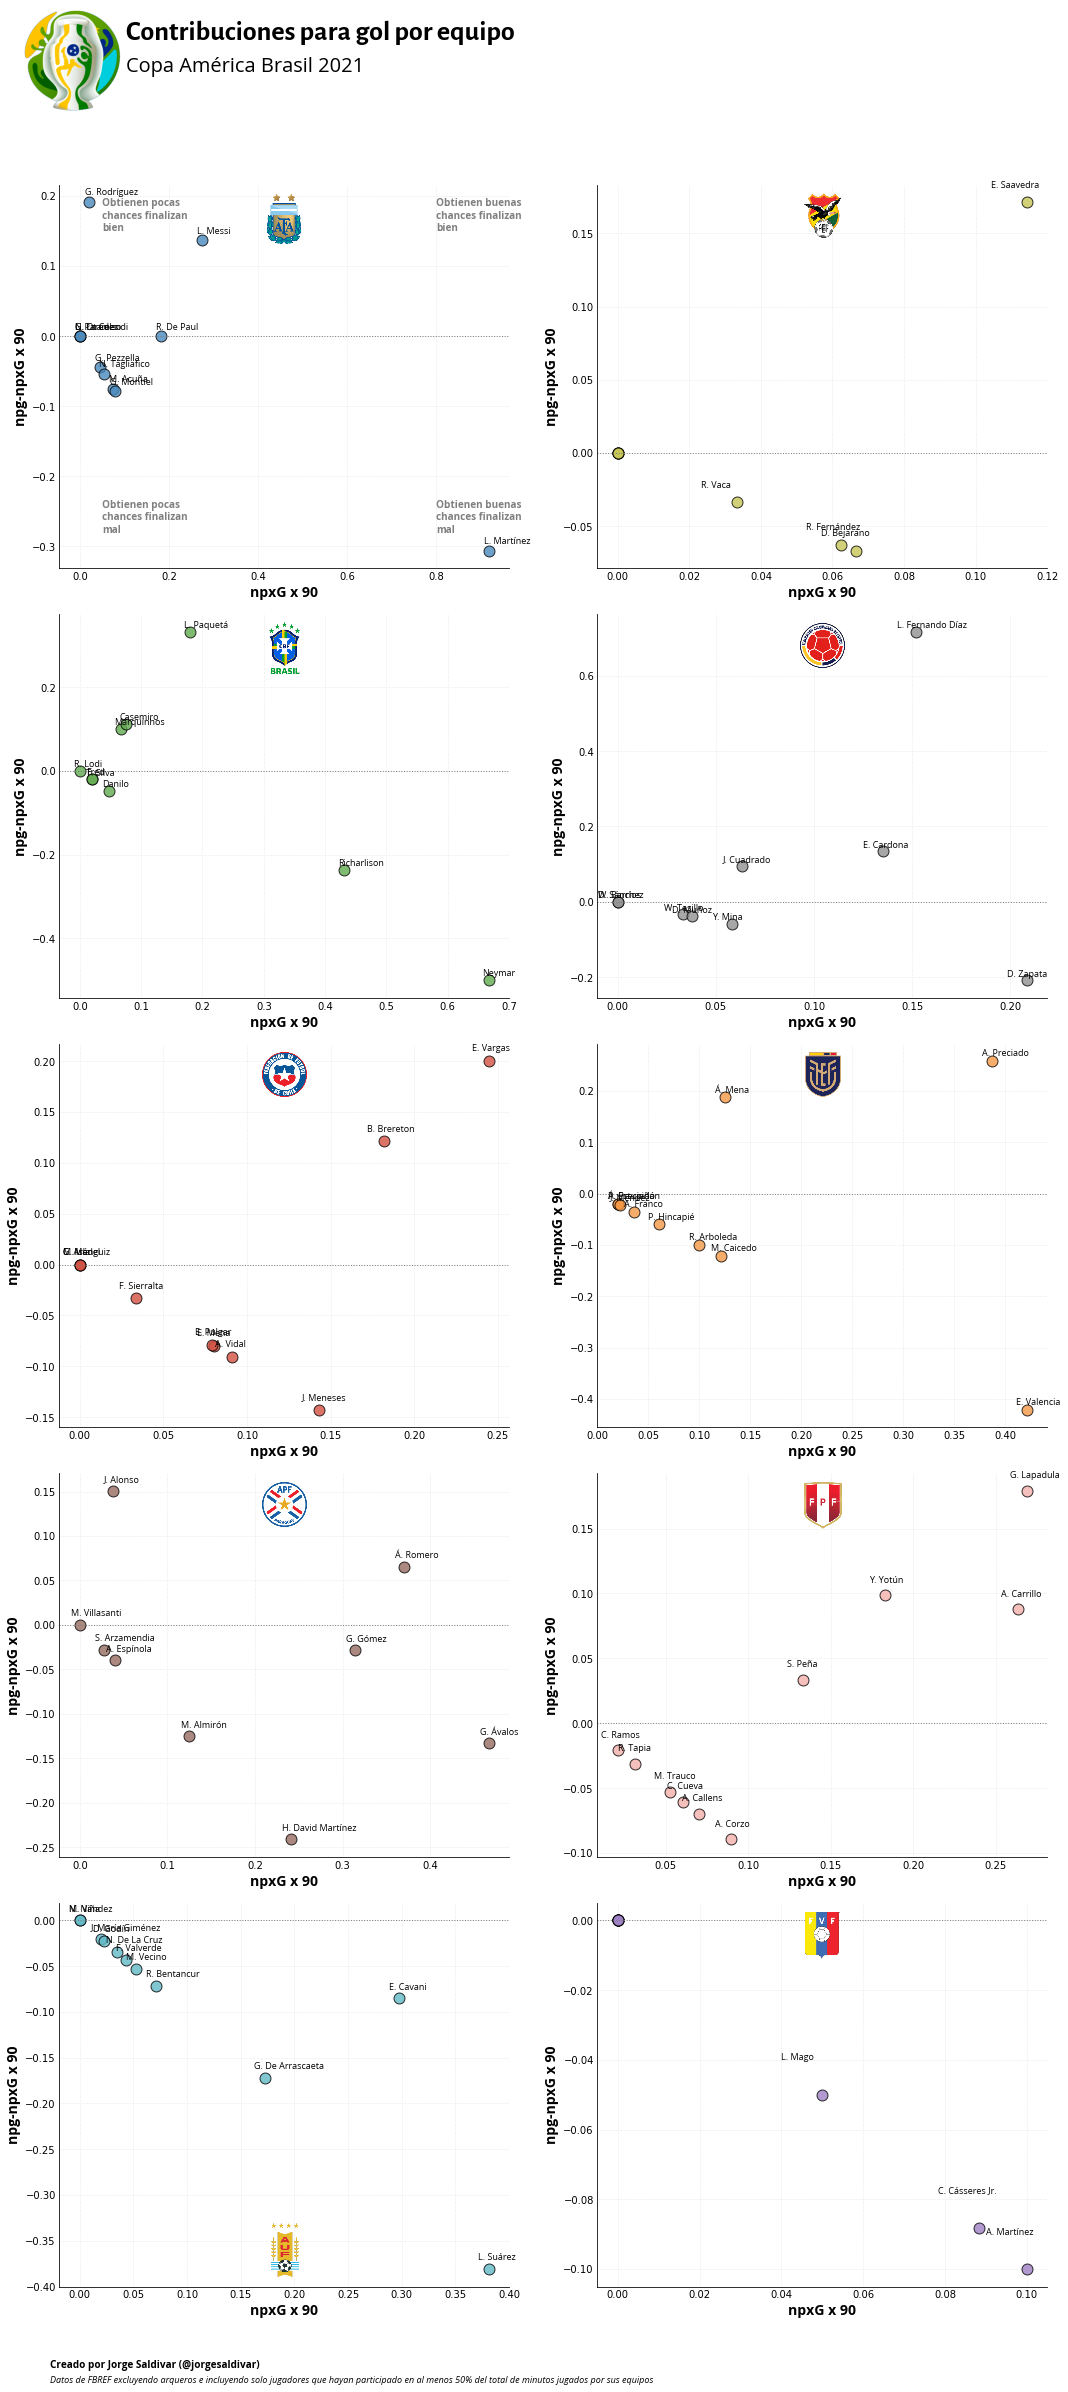

In [138]:
title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "black"
background = "white"
filler = "grey"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15,30))
fig.set_facecolor(background)

colors = {'argentina':'#4A8ABD', 'bolivia':'#C8C656', 'brazil':'#61AA4F', 'colombia':'#919191' , 
          'chile':'#D25041', 'ecuador': '#F49845', 'paraguay': '#976C60', 'peru': '#F3B0AB', 'uruguay': '#60B9C7',
          'venezuela': '#9F81C5'}

idx = 0    
for i in range(0,5):
    for j in range(0,2):
        # set figure's params
        axs[i][j].patch.set_alpha(0)
        axs[i][j].grid(ls="dotted",lw="0.5",color="lightgrey", zorder=1)
        axs[i][j].tick_params(axis="both",length=0)
        spines = ["top","right", "bottom", "left"]
        for s in spines:
            if s in ["top","right"]:
                axs[i][j].spines[s].set_visible(False)
            else:
                axs[i][j].spines[s].set_color(text_color)
        team = analysis_fdf[analysis_fdf['country']==countries[idx]]
        x = team['npxg_per90'].values
        y = team['npg_npxg_per90'].values
        axs[i][j].scatter(x, y, s=120, color=colors[countries[idx]], alpha=0.8, lw=1, zorder=2, edgecolor='black')
        # add players' names
        x_25 = team['npxg_per90'].describe()['25%']
        y_25 = team['npg_npxg_per90'].describe()['25%']
        for k, player_name in enumerate(team['player']):
            delta_x = -0.01
            delta_y = 0.01
            f_player_name = player_name
            if ' ' in f_player_name:
                f_player_name = f"{f_player_name[0]}. {' '.join(f_player_name.split(' ')[1:])}"
            axs[i][j].annotate(f_player_name, (x[k]+delta_x, y[k]+delta_y), fontfamily=body_font, 
                               fontweight="regular", fontsize=9, color=text_color, zorder=3)
        # add axis labels
        axs[i][j].set_xlabel(f"npxG x 90", fontfamily=body_font, fontweight="bold", 
                             fontsize=14, color=text_color)
        axs[i][j].set_ylabel(f"npg-npxG x 90", fontfamily=body_font, fontweight="bold", fontsize=14, 
                             color=text_color)
        # add logo
        if countries[idx] == 'uruguay':
            loc='lower center'
        else:
            loc='upper center'
        img = Image.open(f"imgs/logos/{countries[idx]}.png")
        imagebox = OffsetImage(img, zoom=0.3)
        ab = AnchoredOffsetbox(loc=loc, child=imagebox, frameon=False)
        axs[i][j].add_artist(ab)
        
        # add inner labels but only for the first chart
        if (i+j) == 0:
            axs[i][j].annotate('Obtienen pocas\nchances finalizan\nbien',(0.05, 0.15), fontfamily=body_font, fontweight="bold", 
                               fontsize=10, color='gray', zorder=3)
            axs[i][j].annotate('Obtienen pocas\nchances finalizan\nmal',(0.05, -0.28), fontfamily=body_font, fontweight="bold", 
                               fontsize=10, color='gray', zorder=3)
            axs[i][j].annotate('Obtienen buenas\nchances finalizan\nbien', (0.8, 0.15), fontfamily=body_font, 
                               fontweight="bold", fontsize=10, color='gray', zorder=3)
            axs[i][j].annotate('Obtienen buenas\nchances finalizan\nmal', (0.8, -0.28), fontfamily=body_font, 
                               fontweight="bold", fontsize=10, color='gray', zorder=3)
        
        # add horizontal lineb
        axs[i][j].axhline(y=0, color='gray', linestyle='dotted', lw=1)
        idx += 1

## add title
fig.text(0.12,1.06,"Contribuciones para gol por equipo",fontweight="bold", fontsize=28,fontfamily=title_font, color=text_color)
fig.text(0.12,1.045,"Copa América Brasil 2021",fontweight="regular", fontsize=20,fontfamily=body_font, color=text_color)

## add logo
ax2 = fig.add_axes([0.02,1,0.10,0.10]) # badge
ax2.axis("off")
img = Image.open("imgs/Brasil2021ca.png")
ax2.imshow(img)

## add footer
s = "Creado por Jorge Saldivar (@jorgesaldivar)"
fig.text(0.05, -0.018, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
s = "Datos de FBREF excluyendo arqueros e incluyendo solo jugadores que hayan participado en al menos 50% del total de minutos jugados por sus equipos"
fig.text(0.05, -0.025, s, fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)

plt.tight_layout()
plt.savefig("outputs/goal_scoring.png", bbox_inches="tight", dpi=300)
plt.show()

## 3. Progressive actions 

This analysis is inspired in [@AnalysisMUFC](https://twitter.com/AnalysisMUFC) who published the analysis [here](https://twitter.com/TaikingUnited/status/1470828567235899403). It involves data about `progressive passes (prog)` and `progressive carries (carries_prog)`.

### Load data

In [55]:
# load passing
passing_df = pd.DataFrame()
for country in countries:
    if passing_df.size > 0:
        aux_df = pd.read_csv(f"data/{country}_passing.csv")
        aux_df['country'] = country
        passing_df = passing_df.append(aux_df, ignore_index=True, sort=False)
    else:
        passing_df = pd.read_csv(f"data/{country}_passing.csv")
        passing_df['country'] = country        

In [56]:
passing_df.head()

,player,pos,age,90s,total_cmp,total_att,total_cmp%,total_totdist,total_prgdist,short_cmp,short_att,short_cmp%,medium_cmp,medium_att,medium_cmp%,long_cmp,long_att,long_cmp%,ast,xa,a-xa,kp,1/3,ppa,crspa,prog,matches,country
0,Lionel Messi,"FW,MF",33.0,7.3,249,323,77.1,4417,1525,117,139,84.2,88,107,82.2,33,51,64.7,5,2.9,2.1,22,31,11,1,42,Matches,argentina
1,Emiliano Martínez,GK,28.0,6.3,111,163,68.1,3741,2449,15,15,100.0,54,55,98.2,41,91,45.1,0,0.0,0.0,0,5,0,0,0,Matches,argentina
2,Rodrigo De Paul,MF,26.0,5.5,211,247,85.4,4157,999,87,100,87.0,83,93,89.2,34,44,77.3,1,0.8,0.2,8,18,5,0,22,Matches,argentina
3,Nicolás Otamendi,DF,32.0,5.3,175,199,87.9,3621,1098,53,61,86.9,96,105,91.4,26,31,83.9,0,0.0,0.0,1,13,0,0,9,Matches,argentina
4,Lautaro Martínez,FW,23.0,4.9,41,57,71.9,555,22,25,27,92.6,12,19,63.2,2,6,33.3,0,0.0,0.0,1,2,0,0,0,Matches,argentina


In [57]:
passing_df.shape

(253, 28)

In [58]:
# load possession
possession_df = pd.DataFrame()
for country in countries:
    if possession_df.size > 0:
        aux_df = pd.read_csv(f"data/{country}_possession.csv")
        aux_df['country'] = country
        possession_df = possession_df.append(aux_df, ignore_index=True, sort=False)
    else:
        possession_df = pd.read_csv(f"data/{country}_possession.csv")
        possession_df['country'] = country        

In [59]:
possession_df.head()

,player,pos,age,90s,touches_touches,touches_def pen,touches_def 3rd,touches_mid 3rd,touches_att 3rd,touches_att pen,touches_live,dribbles_succ,dribbles_att,dribbles_succ%,dribbles_#pl,dribbles_megs,carries_carries,carries_totdist,carries_prgdist,carries_prog,carries_1/3,carries_cpa,carries_mis,carries_dis,receiving_targ,receiving_rec,receiving_rec%,receiving_prog,matches,country
0,Lionel Messi,"FW,MF",33.0,7.3,432,1,27,193,254,36,389,33,47,70.2,36,0,354,2085,1306,71,25,12,13,27,378,321,84.9,32,Matches,argentina
1,Emiliano Martínez,GK,28.0,6.3,171,156,171,0,0,0,122,0,0,NaN,0,0,92,477,290,0,0,0,0,0,68,68,100.0,0,Matches,argentina
2,Rodrigo De Paul,MF,26.0,5.5,305,3,75,140,119,7,281,3,10,30.0,5,0,224,1265,670,29,10,1,3,7,226,202,89.4,13,Matches,argentina
3,Nicolás Otamendi,DF,32.0,5.3,258,43,144,130,6,3,242,0,0,NaN,0,0,150,1158,777,16,2,0,1,0,164,163,99.4,1,Matches,argentina
4,Lautaro Martínez,FW,23.0,4.9,129,7,18,54,61,20,123,8,9,88.9,9,1,76,185,85,3,0,1,10,11,135,75,55.6,19,Matches,argentina


In [60]:
possession_df.shape

(253, 30)

In [61]:
# merge datasets
analysis_df = pd.merge(passing_df, possession_df, how='inner', 
                       on=['player', 'pos', 'age', '90s', 'matches', 'country'])

### Check data

In [62]:
print(f"The dataset contains {analysis_df.shape[0]} rows and {analysis_df.shape[1]} columns")

The dataset contains 253 rows and 52 columns


In [63]:
analysis_df.head()

,player,pos,age,90s,total_cmp,total_att,total_cmp%,total_totdist,total_prgdist,short_cmp,short_att,short_cmp%,medium_cmp,medium_att,medium_cmp%,long_cmp,long_att,long_cmp%,ast,xa,a-xa,kp,1/3,ppa,crspa,prog,matches,country,touches_touches,touches_def pen,touches_def 3rd,touches_mid 3rd,touches_att 3rd,touches_att pen,touches_live,dribbles_succ,dribbles_att,dribbles_succ%,dribbles_#pl,dribbles_megs,carries_carries,carries_totdist,carries_prgdist,carries_prog,carries_1/3,carries_cpa,carries_mis,carries_dis,receiving_targ,receiving_rec,receiving_rec%,receiving_prog
0,Lionel Messi,"FW,MF",33.0,7.3,249,323,77.1,4417,1525,117,139,84.2,88,107,82.2,33,51,64.7,5,2.9,2.1,22,31,11,1,42,Matches,argentina,432,1,27,193,254,36,389,33,47,70.2,36,0,354,2085,1306,71,25,12,13,27,378,321,84.9,32
1,Emiliano Martínez,GK,28.0,6.3,111,163,68.1,3741,2449,15,15,100.0,54,55,98.2,41,91,45.1,0,0.0,0.0,0,5,0,0,0,Matches,argentina,171,156,171,0,0,0,122,0,0,NaN,0,0,92,477,290,0,0,0,0,0,68,68,100.0,0
2,Rodrigo De Paul,MF,26.0,5.5,211,247,85.4,4157,999,87,100,87.0,83,93,89.2,34,44,77.3,1,0.8,0.2,8,18,5,0,22,Matches,argentina,305,3,75,140,119,7,281,3,10,30.0,5,0,224,1265,670,29,10,1,3,7,226,202,89.4,13
3,Nicolás Otamendi,DF,32.0,5.3,175,199,87.9,3621,1098,53,61,86.9,96,105,91.4,26,31,83.9,0,0.0,0.0,1,13,0,0,9,Matches,argentina,258,43,144,130,6,3,242,0,0,NaN,0,0,150,1158,777,16,2,0,1,0,164,163,99.4,1
4,Lautaro Martínez,FW,23.0,4.9,41,57,71.9,555,22,25,27,92.6,12,19,63.2,2,6,33.3,0,0.0,0.0,1,2,0,0,0,Matches,argentina,129,7,18,54,61,20,123,8,9,88.9,9,1,76,185,85,3,0,1,10,11,135,75,55.6,19


### Filter data

**Remove goalkeepers**

In [64]:
analysis_df = analysis_df[analysis_df['pos'] != 'GK']

In [65]:
print(f"After removing GKs the dataset contains {analysis_df.shape[0]} players")

After removing GKs the dataset contains 236 players


**Remove players who play less than 50% of the team's played minutes**

In [66]:
min_teams_played = analysis_df.loc[analysis_df['player']=='Squad Total', ['country', '90s']]

In [67]:
analysis_fdf = pd.DataFrame()
for country in countries:
    team = analysis_df[analysis_df['country']==country]
    min_team_played = min_teams_played.loc[min_teams_played['country']==country, '90s'].values[0]
    if analysis_fdf.size > 0:
        analysis_fdf = analysis_fdf.append(team[team['90s'] >= (min_team_played/2)], ignore_index=True, 
                                           sort=False)
    else:
        analysis_fdf = team[team['90s'] >= (min_team_played/2)]

In [68]:
print(f"There are {analysis_fdf.shape[0]} players who played more than 50% of their teams' minutes")

There are 116 players who played more than 50% of their teams' minutes


**Remove summary rows**

In [69]:
analysis_fdf = analysis_fdf[analysis_fdf['player']!='Squad Total']

In [70]:
analysis_fdf = analysis_fdf[analysis_fdf['player']!='Opponent Total']

**Select columns**

In [71]:
cols = ['player', 'pos', 'country', '90s', 'prog', 'carries_prog']

In [72]:
analysis_fdf = analysis_fdf[cols]

In [73]:
analysis_fdf.head()

,player,pos,country,90s,prog,carries_prog
0,Lionel Messi,"FW,MF",argentina,7.3,42,71
1,Rodrigo De Paul,MF,argentina,5.5,22,29
2,Nicolás Otamendi,DF,argentina,5.3,9,16
3,Lautaro Martínez,FW,argentina,4.9,0,3
4,Giovani Lo Celso,MF,argentina,3.7,12,21


**Create columns**

In [74]:
analysis_fdf['prog/90'] = analysis_fdf['prog']/analysis_fdf['90s']
analysis_fdf['carries/90'] = analysis_fdf['carries_prog']/analysis_fdf['90s']

In [120]:
analysis_fdf.loc[analysis_fdf['country']=='venezuela']

,player,pos,country,90s,prog,carries_prog,prog/90,carries/90
105,Luis Mago,DF,venezuela,4.0,5,9,1.250000,2.250000
106,Junior Moreno,MF,venezuela,3.9,13,13,3.333333,3.333333
107,Cristian Cásseres Jr.,"FW,MF",venezuela,3.4,2,7,0.588235,2.058824
108,Alexander González,DF,venezuela,3.2,9,15,2.812500,4.687500
109,José Andrés Martínez,"FW,MF",venezuela,3.2,5,13,1.562500,4.062500
110,Adrián Martínez,DF,venezuela,3.0,4,3,1.333333,1.000000
111,Yohan Cumana,DF,venezuela,2.8,5,5,1.785714,1.785714
112,Fernando Aristeguieta,FW,venezuela,2.4,2,0,0.833333,0.000000
113,Francisco La Mantía,DF,venezuela,2.0,0,0,0.000000,0.000000


### Draw scatterplots

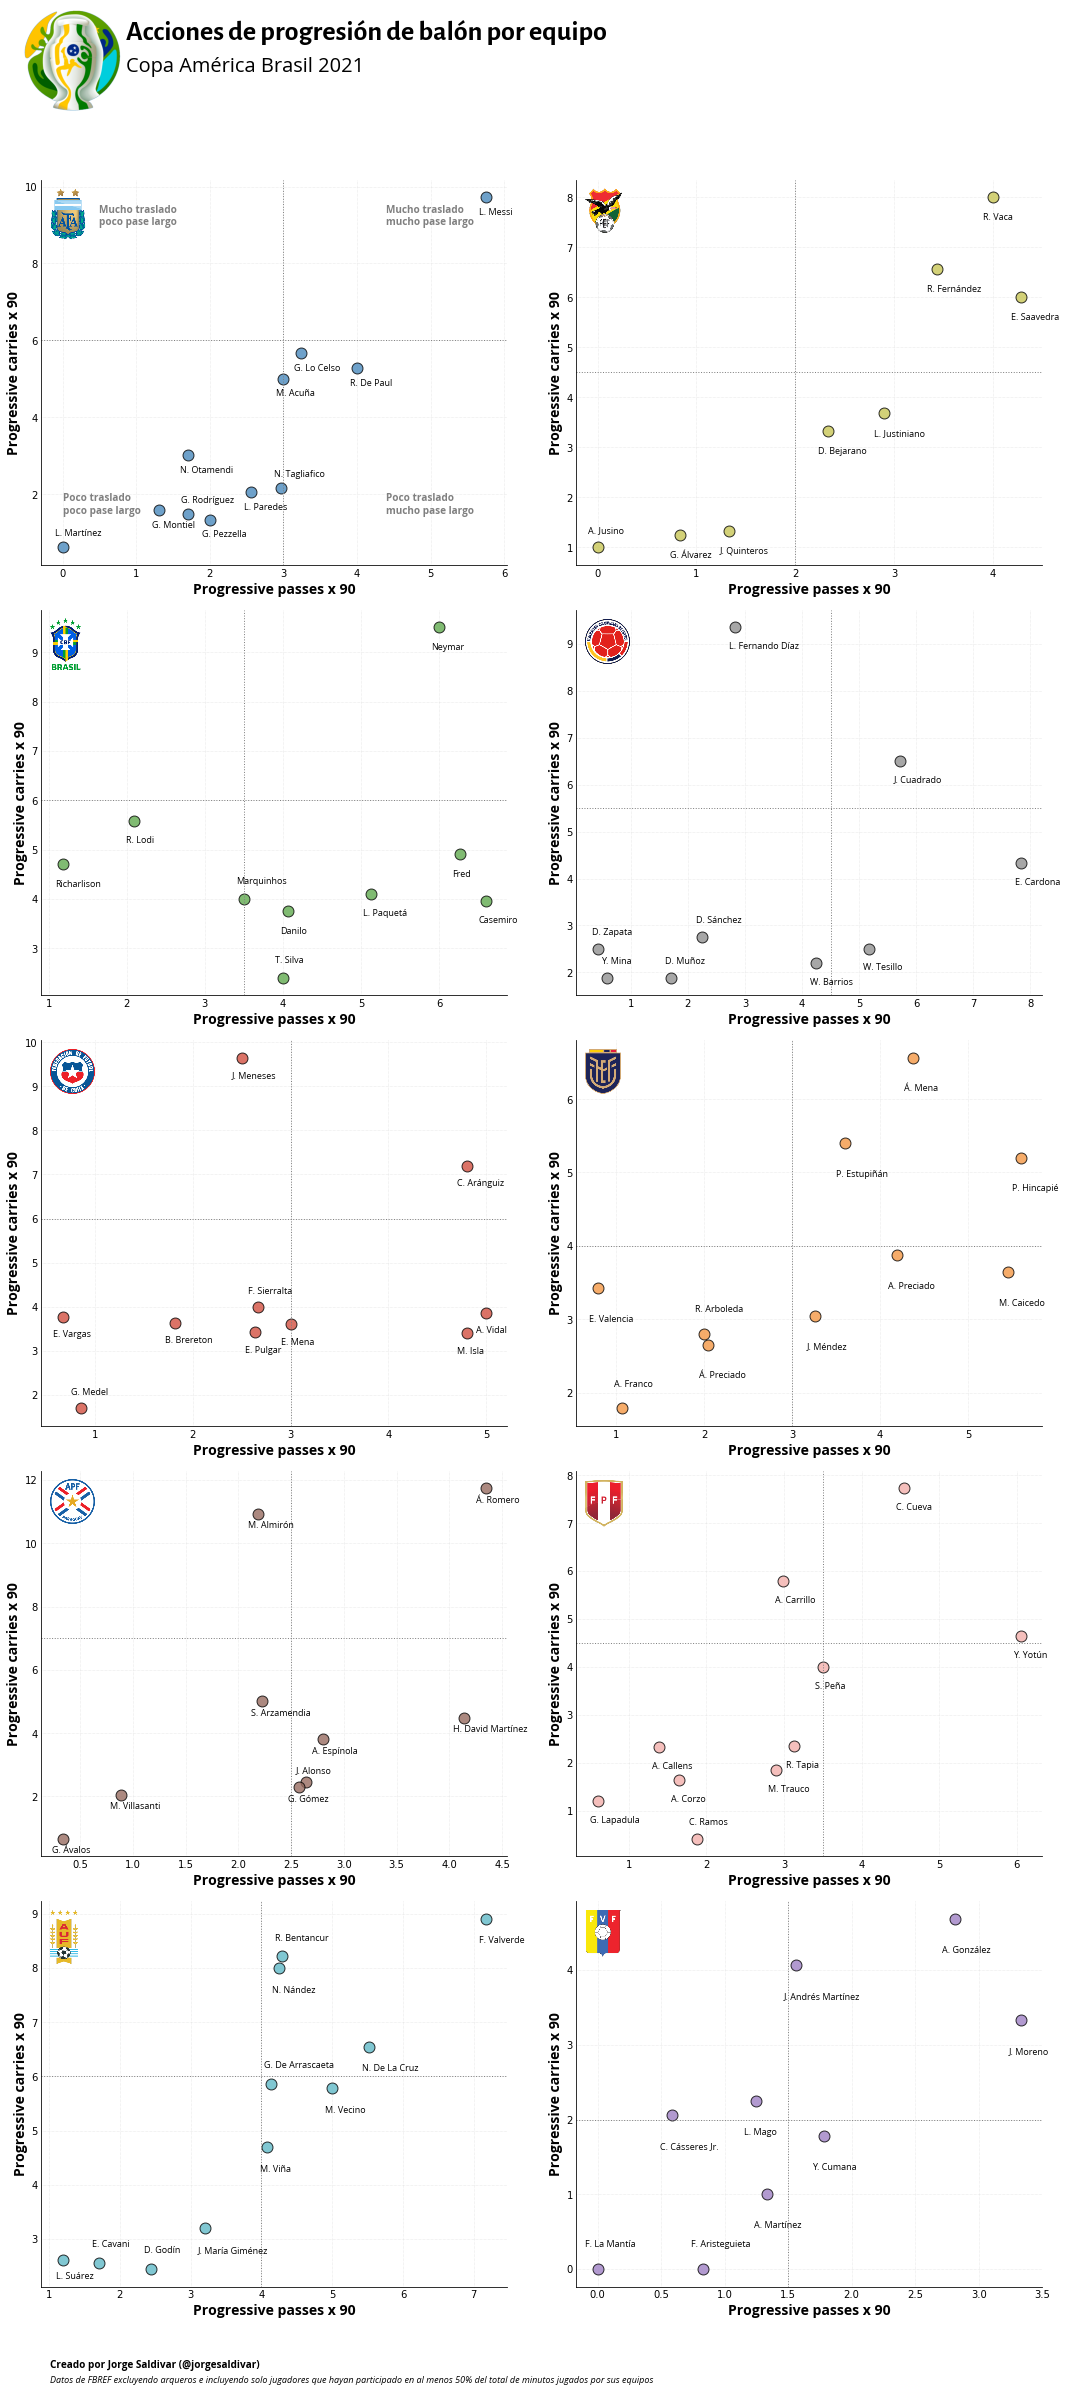

In [119]:
title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "black"
background = "white"
filler = "grey"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15,30))
fig.set_facecolor(background)

colors = {'argentina':'#4A8ABD', 'bolivia':'#C8C656', 'brazil':'#61AA4F', 'colombia':'#919191' , 
          'chile':'#D25041', 'ecuador': '#F49845', 'paraguay': '#976C60', 'peru': '#F3B0AB', 'uruguay': '#60B9C7',
          'venezuela': '#9F81C5'}

idx = 0    
for i in range(0,5):
    for j in range(0,2):
        # set figure's params
        axs[i][j].patch.set_alpha(0)
        axs[i][j].grid(ls="dotted",lw="0.5",color="lightgrey", zorder=1)
        axs[i][j].tick_params(axis="both",length=0)
        spines = ["top","right", "bottom", "left"]
        for s in spines:
            if s in ["top","right"]:
                axs[i][j].spines[s].set_visible(False)
            else:
                axs[i][j].spines[s].set_color(text_color)
        team = analysis_fdf[analysis_fdf['country']==countries[idx]]
        x = team['prog/90'].values
        y = team['carries/90'].values
        axs[i][j].scatter(x, y, s=120, color=colors[countries[idx]], alpha=0.8, lw=1, zorder=2, edgecolor='black')
        
        # add horizontal line
        axs[i][j].axhline(y=np.median(axs[i][j].get_yticks()), color='gray', linestyle='dotted', lw=1)
        # add vertical line
        axs[i][j].axvline(x=np.median(axs[i][j].get_xticks()), color='gray', linestyle='dotted', lw=1)
        
        # add players' names
        x_25 = team['prog/90'].describe()['25%']
        y_25 = team['carries/90'].describe()['25%']
        for k, player_name in enumerate(team['player']):
            delta_x = -0.1
            delta_y = -0.45
            f_player_name = player_name
            if player_name in ['Adrian Jusino', 'Guido Rodríguez', 'Nicolás Tagliafico', 'Lautaro Martínez',
                               'Thiago Silva', 'Marquinhos', 'Duván Zapata', 'Yerry Mina', 'Daniel Muñoz',
                               'Davinson Sánchez', 'Francisco Sierralta', 'Gary Medel', 'Robert Arboleda',
                               'Alan Franco', 'Júnior Alonso', 'Christian Ramos', 'Rodrigo Bentancur',
                               'Giorgian De Arrascaeta', 'Edinson Cavani', 'Diego Godín', 'Francisco La Mantía',
                               'Fernando Aristeguieta']:
                delta_y = 0.3
            if player_name in ['Luis Suárez']:
                delta_y = -0.35
            if ' ' in f_player_name:
                f_player_name = f"{f_player_name[0]}. {' '.join(f_player_name.split(' ')[1:])}"
            axs[i][j].annotate(f_player_name, (x[k]+delta_x, y[k]+delta_y), fontfamily=body_font, 
                               fontweight="regular", fontsize=9, color=text_color, zorder=3)
        # add axis labels
        axs[i][j].set_xlabel(f"Progressive passes x 90", fontfamily=body_font, fontweight="bold", 
                             fontsize=14, color=text_color)
        axs[i][j].set_ylabel(f"Progressive carries x 90", fontfamily=body_font, fontweight="bold", fontsize=14, 
                             color=text_color)
        # add logo
        loc='upper left'
        img = Image.open(f"imgs/logos/{countries[idx]}.png")
        imagebox = OffsetImage(img, zoom=0.3)
        ab = AnchoredOffsetbox(loc=loc, child=imagebox, frameon=False)
        axs[i][j].add_artist(ab)
        
        # add inner labels but only for the first chart
        if (i+j) == 0:
            axs[i][j].annotate('Mucho traslado\npoco pase largo',(0.5, 9), fontfamily=body_font, fontweight="bold", 
                               fontsize=10, color='gray', zorder=3)
            axs[i][j].annotate('Poco traslado\npoco pase largo',(0, 1.5), fontfamily=body_font, fontweight="bold", 
                               fontsize=10, color='gray', zorder=3)
            axs[i][j].annotate('Mucho traslado\nmucho pase largo', (4.4, 9), fontfamily=body_font, 
                               fontweight="bold", fontsize=10, color='gray', zorder=3)
            axs[i][j].annotate('Poco traslado\nmucho pase largo', (4.4, 1.5), fontfamily=body_font, 
                               fontweight="bold", fontsize=10, color='gray', zorder=3)
        
        # add horizontal lineb
        #axs[i][j].axhline(y=0, color='gray', linestyle='dotted', lw=1)
        idx += 1

## add title
fig.text(0.12,1.06,"Acciones de progresión de balón por equipo",fontweight="bold", fontsize=28,fontfamily=title_font, color=text_color)
fig.text(0.12,1.045,"Copa América Brasil 2021",fontweight="regular", fontsize=20,fontfamily=body_font, color=text_color)

## add logo
ax2 = fig.add_axes([0.02,1,0.10,0.10]) # badge
ax2.axis("off")
img = Image.open("imgs/Brasil2021ca.png")
ax2.imshow(img)

## add footer
s = "Creado por Jorge Saldivar (@jorgesaldivar)"
fig.text(0.05, -0.018, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
s = "Datos de FBREF excluyendo arqueros e incluyendo solo jugadores que hayan participado en al menos 50% del total de minutos jugados por sus equipos"
fig.text(0.05, -0.025, s, fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)

plt.tight_layout()
plt.savefig("outputs/progressive_actions.png", bbox_inches="tight", dpi=300)
plt.show()

## 4. Defensive actions

This analysis is inspired in [@AnalysisMUFC](https://twitter.com/AnalysisMUFC) who published the analysis [here](https://twitter.com/TaikingUnited/status/1470846099200036864). It involves data about `pressures (pressures_press)` and `tackle + interception (tkl+int)`.

### Load data

In [4]:
name_ds = 'defensive_actions'
analysis_df = pd.DataFrame()
for country in countries:
    if analysis_df.size > 0:
        aux_analysis_df = pd.read_csv(f"data/{country}_{name_ds}.csv")
        aux_analysis_df['country'] = country
        analysis_df = analysis_df.append(aux_analysis_df, ignore_index=True, sort=False)
    else:
        analysis_df = pd.read_csv(f"data/{country}_{name_ds}.csv")
        analysis_df['country'] = country        

### Check data

In [5]:
print(f"The dataset contains {analysis_df.shape[0]} rows and {analysis_df.shape[1]} columns")

The dataset contains 253 rows and 29 columns


In [6]:
analysis_df.head()

,player,pos,age,90s,tackles_tkl,tackles_tklw,tackles_def 3rd,tackles_mid 3rd,tackles_att 3rd,vsdribbles_tkl,vsdribbles_att,vsdribbles_tkl%,vsdribbles_past,pressures_press,pressures_succ,pressures_%,pressures_def 3rd,pressures_mid 3rd,pressures_att 3rd,blocks_blocks,blocks_sh,blocks_shsv,blocks_pass,int,tkl+int,clr,err,matches,country
0,Lionel Messi,"FW,MF",33.0,7.3,8,6,1,4,3,3,9,33.3,6,93,27,29.0,13,37,43,3,1,0,2,3,11,0,0,Matches,argentina
1,Emiliano Martínez,GK,28.0,6.3,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,Matches,argentina
2,Rodrigo De Paul,MF,26.0,5.5,11,10,7,2,2,5,8,62.5,3,87,30,34.5,37,29,21,8,0,0,8,8,19,5,0,Matches,argentina
3,Nicolás Otamendi,DF,32.0,5.3,9,5,7,2,0,4,7,57.1,3,49,20,40.8,32,17,0,9,2,0,7,5,14,34,1,Matches,argentina
4,Lautaro Martínez,FW,23.0,4.9,5,3,1,2,2,3,6,50.0,3,88,15,17.0,3,41,44,5,1,0,4,5,10,5,0,Matches,argentina


### Filter data

**Remove goalkeepers**

In [7]:
analysis_df = analysis_df[analysis_df['pos'] != 'GK']

In [8]:
print(f"After removing GKs the dataset contains {analysis_df.shape[0]} players")

After removing GKs the dataset contains 236 players


**Remove players who play less than 50% of the team's played minutes**

In [9]:
min_teams_played = analysis_df.loc[analysis_df['player']=='Squad Total', ['country', '90s']]

In [10]:
analysis_fdf = pd.DataFrame()
for country in countries:
    team = analysis_df[analysis_df['country']==country]
    min_team_played = min_teams_played.loc[min_teams_played['country']==country, '90s'].values[0]
    if analysis_fdf.size > 0:
        analysis_fdf = analysis_fdf.append(team[team['90s'] >= (min_team_played/2)], ignore_index=True, 
                                           sort=False)
    else:
        analysis_fdf = team[team['90s'] >= (min_team_played/2)]

In [11]:
print(f"There are {analysis_fdf.shape[0]} players who played more than 50% of their teams' minutes")

There are 116 players who played more than 50% of their teams' minutes


**Remove summary rows**

In [12]:
analysis_fdf = analysis_fdf[analysis_fdf['player']!='Squad Total']

In [13]:
analysis_fdf = analysis_fdf[analysis_fdf['player']!='Opponent Total']

**Select columns**

In [14]:
cols = ['player', 'pos', 'country', '90s', 'pressures_press', 'tkl+int']

In [15]:
analysis_fdf = analysis_fdf[cols]

In [16]:
analysis_fdf.head()

,player,pos,country,90s,pressures_press,tkl+int
0,Lionel Messi,"FW,MF",argentina,7.3,93,11
1,Rodrigo De Paul,MF,argentina,5.5,87,19
2,Nicolás Otamendi,DF,argentina,5.3,49,14
3,Lautaro Martínez,FW,argentina,4.9,88,10
4,Giovani Lo Celso,MF,argentina,3.7,60,8


**Create analysis columns**

In [17]:
analysis_fdf['press/90'] = analysis_fdf['pressures_press']/analysis_fdf['90s']
analysis_fdf['tkl_int/90'] = analysis_fdf['tkl+int']/analysis_fdf['90s']

In [51]:
analysis_fdf.loc[analysis_fdf['country']=='peru']

,player,pos,country,90s,pressures_press,tkl+int,press/90,tkl_int/90
80,Yoshimar Yotún,MF,peru,7.1,208,32,29.295775,4.507042
81,Gianluca Lapadula,FW,peru,6.7,79,6,11.791045,0.895522
82,Aldo Corzo,DF,peru,6.7,83,23,12.388060,3.432836
83,Christian Cueva,"FW,MF",peru,6.6,144,24,21.818182,3.636364
84,Renato Tapia,MF,peru,6.4,140,30,21.875000,4.687500
85,Sergio Peña,"MF,FW",peru,6.0,137,25,22.833333,4.166667
86,André Carrillo,"FW,MF",peru,5.7,130,18,22.807018,3.157895
87,Christian Ramos,DF,peru,4.8,53,8,11.041667,1.666667
88,Alexander Callens,DF,peru,4.3,40,11,9.302326,2.558140
89,Miguel Trauco,DF,peru,3.8,47,16,12.368421,4.210526


### Draw scatterplots

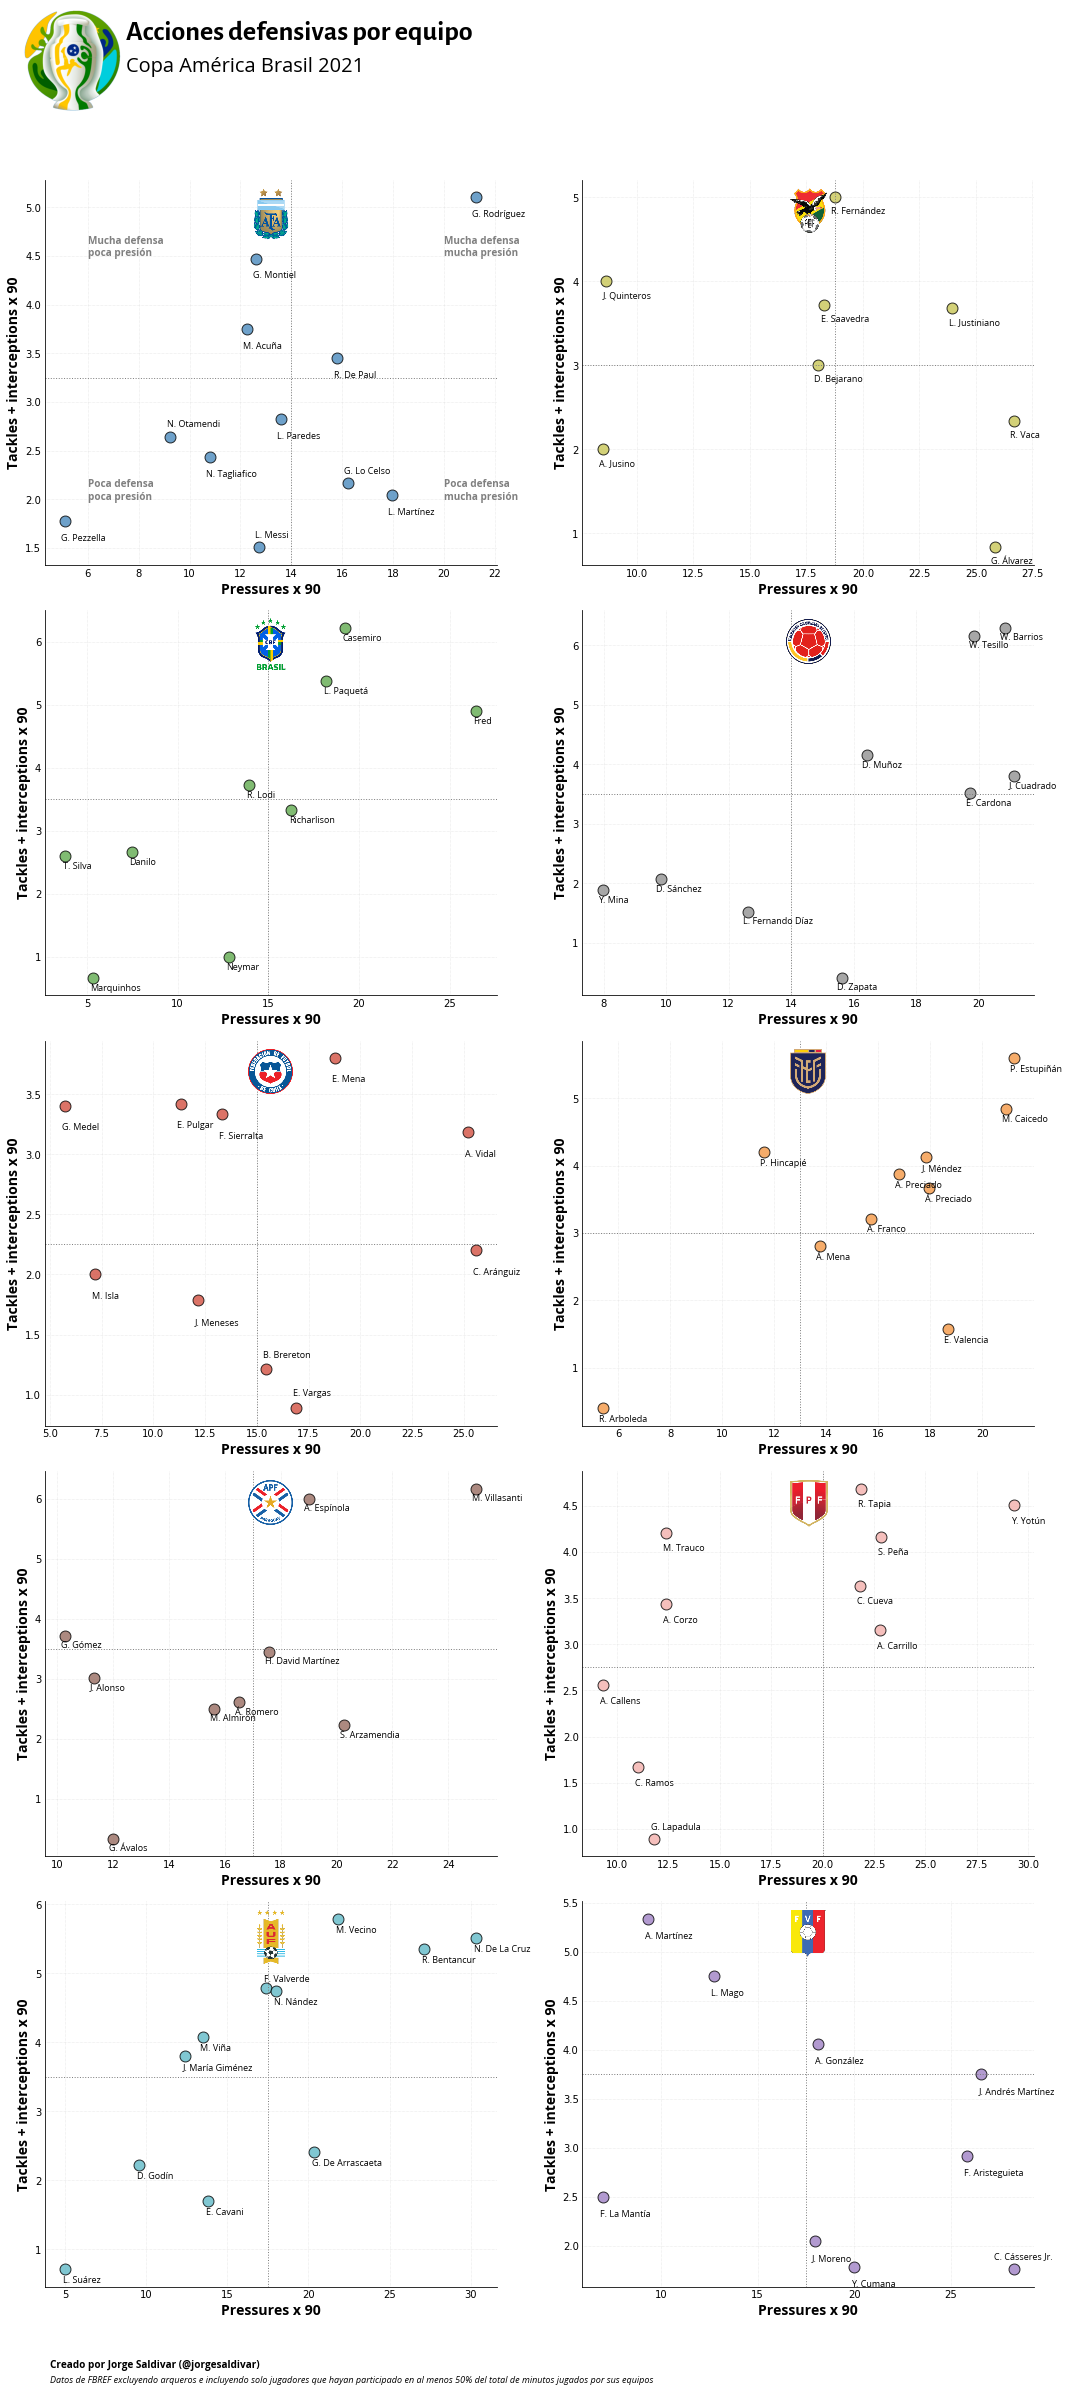

In [54]:
title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "black"
background = "white"
filler = "grey"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15,30))
fig.set_facecolor(background)

colors = {'argentina':'#4A8ABD', 'bolivia':'#C8C656', 'brazil':'#61AA4F', 'colombia':'#919191' , 
          'chile':'#D25041', 'ecuador': '#F49845', 'paraguay': '#976C60', 'peru': '#F3B0AB', 'uruguay': '#60B9C7',
          'venezuela': '#9F81C5'}

idx = 0    
for i in range(0,5):
    for j in range(0,2):
        # set figure's params
        axs[i][j].patch.set_alpha(0)
        axs[i][j].grid(ls="dotted",lw="0.5",color="lightgrey", zorder=1)
        axs[i][j].tick_params(axis="both",length=0)
        
        spines = ["top","right", "bottom", "left"]
        for s in spines:
            if s in ["top","right"]:
                axs[i][j].spines[s].set_visible(False)
            else:
                axs[i][j].spines[s].set_color(text_color)
        team = analysis_fdf[analysis_fdf['country']==countries[idx]]
        x = team['press/90'].values
        y = team['tkl_int/90'].values
        axs[i][j].scatter(x, y, s=120, color=colors[countries[idx]], alpha=0.8, lw=1, zorder=2, edgecolor='black')
        
        # add horizontal line
        axs[i][j].axhline(y=np.median(axs[i][j].get_yticks()), color='gray', linestyle='dotted', lw=1)
        # add vertical line
        axs[i][j].axvline(x=np.median(axs[i][j].get_xticks()), color='gray', linestyle='dotted', lw=1)
        
        # add players' names
        x_25 = team['press/90'].describe()['25%']
        y_25 = team['tkl_int/90'].describe()['25%']
        for k, player_name in enumerate(team['player']):
            delta_x = -0.15
            delta_y = -0.20
            f_player_name = player_name
            if player_name in ['Cristian Cásseres Jr.']:
                delta_y = 0.1
                delta_x = -1
            if player_name in ['Lionel Messi', 'Eduardo Vargas', 'Ben Brereton', 'Gianluca Lapadula']:
                delta_y = 0.1
            if player_name in ['Federico Valverde', 'Nicolás Otamendi', 'Giovani Lo Celso']:
                delta_y = 0.1
            if ' ' in f_player_name:
                f_player_name = f"{f_player_name[0]}. {' '.join(f_player_name.split(' ')[1:])}"
            axs[i][j].annotate(f_player_name, (x[k]+delta_x, y[k]+delta_y), fontfamily=body_font, 
                               fontweight="regular", fontsize=9, color=text_color, zorder=3)
        # add axis labels
        axs[i][j].set_xlabel(f"Pressures x 90", fontfamily=body_font, fontweight="bold", 
                             fontsize=14, color=text_color)
        axs[i][j].set_ylabel(f"Tackles + interceptions x 90", fontfamily=body_font, fontweight="bold", fontsize=14, 
                             color=text_color)
        # add logo
        loc='upper center'
        img = Image.open(f"imgs/logos/{countries[idx]}.png")
        imagebox = OffsetImage(img, zoom=0.3)
        ab = AnchoredOffsetbox(loc=loc, child=imagebox, frameon=False)
        axs[i][j].add_artist(ab)
        
        # add inner labels but only for the first chart
        if (i+j) == 0:
            axs[i][j].annotate('Mucha defensa\npoca presión',(6, 4.5), fontfamily=body_font, fontweight="bold", 
                               fontsize=10, color='gray', zorder=3)
            axs[i][j].annotate('Poca defensa\npoca presión',(6, 2), fontfamily=body_font, fontweight="bold", 
                               fontsize=10, color='gray', zorder=3)
            axs[i][j].annotate('Mucha defensa\nmucha presión', (20, 4.5), fontfamily=body_font, 
                               fontweight="bold", fontsize=10, color='gray', zorder=3)
            axs[i][j].annotate('Poca defensa\nmucha presión', (20, 2), fontfamily=body_font, 
                               fontweight="bold", fontsize=10, color='gray', zorder=3)
        
        # add horizontal lineb
        #axs[i][j].axhline(y=0, color='gray', linestyle='dotted', lw=1)
        idx += 1

## add title
fig.text(0.12,1.06,"Acciones defensivas por equipo",fontweight="bold", fontsize=28,fontfamily=title_font, color=text_color)
fig.text(0.12,1.045,"Copa América Brasil 2021",fontweight="regular", fontsize=20,fontfamily=body_font, color=text_color)

## add logo
ax2 = fig.add_axes([0.02,1,0.10,0.10]) # badge
ax2.axis("off")
img = Image.open("imgs/Brasil2021ca.png")
ax2.imshow(img)

## add footer
s = "Creado por Jorge Saldivar (@jorgesaldivar)"
fig.text(0.05, -0.018, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
s = "Datos de FBREF excluyendo arqueros e incluyendo solo jugadores que hayan participado en al menos 50% del total de minutos jugados por sus equipos"
fig.text(0.05, -0.025, s, fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)

plt.tight_layout()
plt.savefig("outputs/defensive_actions.png", bbox_inches="tight", dpi=300)
plt.show()

## 5. Pressing zones

This analysis is inspired in [@StatsBomb](https://twitter.com/StatsBomb) who published the analysis [here](https://twitter.com/StatsBomb/status/1214629788314419200). It involves data about pressures. Charts are based on the blog post [FBRef Pressure](https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_plots/plot_fbref.html#sphx-glr-gallery-pitch-plots-plot-fbref-py).

### Load data

In [69]:
analysis_df = pd.DataFrame()
for country in countries:
    if analysis_df.size > 0:
        aux_analysis_df = pd.read_csv(f"data/{country}_defensive_actions.csv")
        aux_analysis_df['country'] = country
        analysis_df = analysis_df.append(aux_analysis_df, ignore_index=True, sort=False)
    else:
        analysis_df = pd.read_csv(f"data/{country}_defensive_actions.csv")
        analysis_df['country'] = country        

### Check data

In [70]:
print(f"The dataset contains {analysis_df.shape[0]} rows and {analysis_df.shape[1]} columns")

The dataset contains 253 rows and 29 columns


In [71]:
analysis_df.tail()

,player,pos,age,90s,tackles_tkl,tackles_tklw,tackles_def 3rd,tackles_mid 3rd,tackles_att 3rd,vsdribbles_tkl,vsdribbles_att,vsdribbles_tkl%,vsdribbles_past,pressures_press,pressures_succ,pressures_%,pressures_def 3rd,pressures_mid 3rd,pressures_att 3rd,blocks_blocks,blocks_sh,blocks_shsv,blocks_pass,int,tkl+int,clr,err,matches,country
248,Jan Carlos Hurtado,FW,20.0,0.3,0,0,0,0,0,0,0,NaN,0,15,3,20.0,0,10,5,0,0,0,0,0,0,1,0,Matches,venezuela
249,Richard Celis,MF,24.0,0.3,4,2,2,2,0,2,3,66.7,1,13,3,23.1,5,6,2,2,0,0,2,2,6,1,0,Matches,venezuela
250,Yeferson Soteldo,"FW,MF",23.0,0.2,0,0,0,0,0,0,0,NaN,0,7,1,14.3,1,3,3,0,0,0,0,0,0,0,0,Matches,venezuela
251,Squad Total,NaN,26.0,4.0,75,53,41,26,8,39,87,44.8,48,710,182,25.6,327,280,103,67,19,1,48,68,143,104,2,NaN,venezuela
252,Opponent Total,NaN,27.3,4.0,77,43,28,32,17,30,71,42.3,41,704,233,33.1,185,317,202,52,10,0,42,50,127,78,0,NaN,venezuela


### Filter data

In [72]:
pressing_zones_by_team = analysis_df.loc[analysis_df['player']=='Squad Total', ['country','pressures_def 3rd', 
                                                                                'pressures_mid 3rd',
                                                                                'pressures_att 3rd']]

### Add a total row

In [73]:
total_row = pd.Series({'country':'total','pressures_def 3rd': pressing_zones_by_team['pressures_def 3rd'].sum(),
                       'pressures_mid 3rd': pressing_zones_by_team['pressures_mid 3rd'].sum(),
                       'pressures_att 3rd': pressing_zones_by_team['pressures_att 3rd'].sum()})
pressing_zones_by_team = pressing_zones_by_team.append(total_row, ignore_index=True)

### Add average row

In [74]:
avg_row = pd.Series({'country':'avg','pressures_def 3rd': pressing_zones_by_team['pressures_def 3rd'].mean(),
                     'pressures_mid 3rd': pressing_zones_by_team['pressures_mid 3rd'].mean(),
                     'pressures_att 3rd': pressing_zones_by_team['pressures_att 3rd'].mean()})
pressing_zones_by_team = pressing_zones_by_team.append(avg_row, ignore_index=True)

### Add total columns

In [75]:
pressing_zones_by_team['per_pressures_def 3rd'] = round(pressing_zones_by_team['pressures_def 3rd'] / (pressing_zones_by_team['pressures_def 3rd']+pressing_zones_by_team['pressures_mid 3rd']+pressing_zones_by_team['pressures_att 3rd']),3)
pressing_zones_by_team['per_pressures_mid 3rd'] = round(pressing_zones_by_team['pressures_mid 3rd'] / (pressing_zones_by_team['pressures_def 3rd']+pressing_zones_by_team['pressures_mid 3rd']+pressing_zones_by_team['pressures_att 3rd']),3)
pressing_zones_by_team['per_pressures_att 3rd'] = round(pressing_zones_by_team['pressures_att 3rd'] / (pressing_zones_by_team['pressures_def 3rd']+pressing_zones_by_team['pressures_mid 3rd']+pressing_zones_by_team['pressures_att 3rd']),3)

### Check computed data

In [76]:
pressing_zones_by_team

,country,pressures_def 3rd,pressures_mid 3rd,pressures_att 3rd,per_pressures_def 3rd,per_pressures_mid 3rd,per_pressures_att 3rd
0,argentina,322.000000,420.000000,247.000000,0.326,0.425,0.250
1,bolivia,310.000000,279.000000,186.000000,0.400,0.360,0.240
2,brazil,313.000000,424.000000,250.000000,0.317,0.430,0.253
3,colombia,499.000000,564.000000,311.000000,0.363,0.410,0.226
4,chile,332.000000,311.000000,156.000000,0.416,0.389,0.195
5,ecuador,231.000000,388.000000,226.000000,0.273,0.459,0.267
6,paraguay,328.000000,413.000000,167.000000,0.361,0.455,0.184
7,peru,466.000000,591.000000,233.000000,0.361,0.458,0.181
8,uruguay,284.000000,376.000000,179.000000,0.338,0.448,0.213
9,venezuela,327.000000,280.000000,103.000000,0.461,0.394,0.145


### Sort data so teams that press higher are last

In [77]:
pressing_zones_by_team.sort_values(['per_pressures_att 3rd', 'per_pressures_def 3rd'], ascending=[True, False], inplace=True)

In [78]:
pressing_zones_by_team

,country,pressures_def 3rd,pressures_mid 3rd,pressures_att 3rd,per_pressures_def 3rd,per_pressures_mid 3rd,per_pressures_att 3rd
9,venezuela,327.000000,280.000000,103.000000,0.461,0.394,0.145
7,peru,466.000000,591.000000,233.000000,0.361,0.458,0.181
6,paraguay,328.000000,413.000000,167.000000,0.361,0.455,0.184
4,chile,332.000000,311.000000,156.000000,0.416,0.389,0.195
8,uruguay,284.000000,376.000000,179.000000,0.338,0.448,0.213
10,total,3412.000000,4046.000000,2058.000000,0.359,0.425,0.216
11,avg,620.363636,735.636364,374.181818,0.359,0.425,0.216
3,colombia,499.000000,564.000000,311.000000,0.363,0.410,0.226
1,bolivia,310.000000,279.000000,186.000000,0.400,0.360,0.240
0,argentina,322.000000,420.000000,247.000000,0.326,0.425,0.250


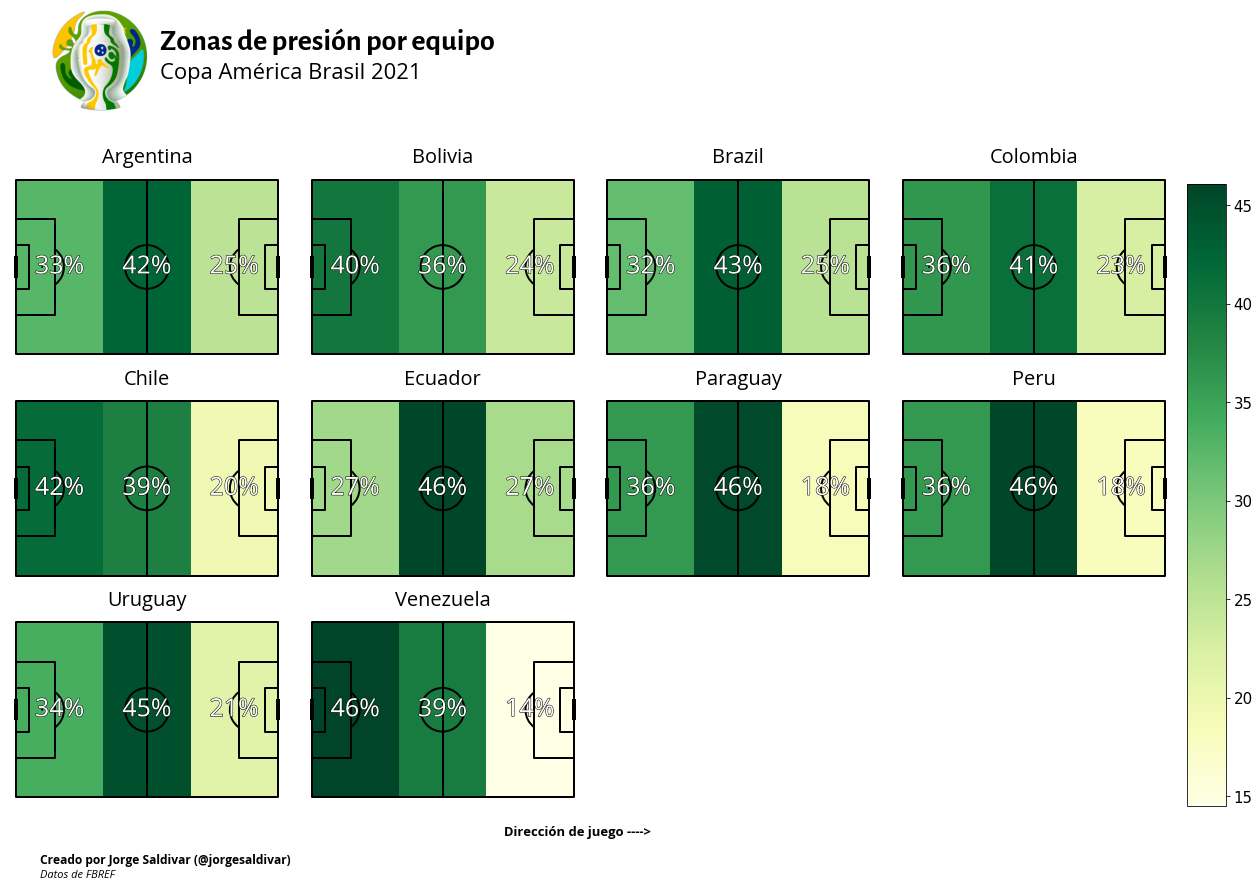

In [79]:
pressure_cols = ['per_pressures_def 3rd', 'per_pressures_mid 3rd', 'per_pressures_att 3rd']

title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "black"
background = "white"
filler = "grey"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

path_eff = [path_effects.Stroke(linewidth=1, foreground='black'),
            path_effects.Normal()]

# setup a mplsoccer pitch
pitch = Pitch(line_zorder=2, line_color='black', pad_top=10)

# mplsoccer calculates the binned statistics usually from raw locations, such as pressure events
# for this example we will create a binned statistic dividing
# the pitch into thirds for one point (0, 0)
# we will fill this in a loop later with each team's statistics from the dataframe
bin_statistic = pitch.bin_statistic([0], [0], statistic='count', bins=(3, 1))

GRID_HEIGHT = 0.9
CBAR_WIDTH = 0.03
fig, axs = pitch.grid(nrows=3, ncols=4, figheight=(10),
                      # leaves some space on the right hand side for the colorbar
                      grid_width=0.88, left=0.025,
                      endnote_height=0.03, endnote_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      title_space=0.01, title_height=0.04, grid_height=GRID_HEIGHT)
fig.set_facecolor('white')

teams = countries
vmin = pressing_zones_by_team[pressure_cols].min().min() * 100 # normalise the heatmaps with the min / max values
vmax = pressing_zones_by_team[pressure_cols].max().max() * 100

for i, ax in enumerate(axs['pitch'].flat[:len(teams)]):
    # the top of the StatsBomb pitch is zero
    # plot the title half way between zero and -20 (the top padding)
    ax.text(60, -10, teams[i].title(), ha='center', va='center', fontsize=20, font=body_font)

    # fill in the bin statistics from df and plot the heatmap
    bin_statistic['statistic'] = pressing_zones_by_team.loc[pressing_zones_by_team.country == teams[i], 
                                                            pressure_cols].values * 100
    heatmap = pitch.heatmap(bin_statistic, ax=ax, cmap='YlGn', vmin=vmin, vmax=vmax)
    annotate = pitch.label_heatmap(bin_statistic, color='white', fontsize=25, ax=ax,
                                   str_format='{0:.0f}%', ha='center', va='center', 
                                   font=body_font, path_effects=path_eff)

# Remove the two spare pitches
if len(teams) == 10:
    for ax in axs['pitch'][-1, 2:]:
        ax.remove()
    
# add cbar axes
cbar_bottom = axs['pitch'][-1, 0].get_position().y0
cbar_left = axs['pitch'][0, -1].get_position().x1 + 0.01
ax_cbar = fig.add_axes((cbar_left, cbar_bottom, CBAR_WIDTH,
                        # take a little bit off the height because of padding
                        GRID_HEIGHT - 0.036))
cbar = plt.colorbar(heatmap, cax=ax_cbar)
for label in cbar.ax.get_yticklabels():
    #label.set_fontproperties(fm.prop)
    label.set_fontsize(15)

## add title
fig.text(0.14,1.09,"Zonas de presión por equipo",fontweight="bold", fontsize=30,fontfamily=title_font, color=text_color)
fig.text(0.14,1.05,"Copa América Brasil 2021",fontweight="regular", fontsize=22,fontfamily=body_font, color=text_color)

## add logo
ax2 = fig.add_axes([0.02,1,0.15,0.15]) # badge
ax2.axis("off")
img = Image.open("imgs/Brasil2021ca.png")
ax2.imshow(img)
    
## add footer
s = "Dirección de juego ---->"
fig.text(0.4, -0.0005, s, fontweight="bold", fontsize=13, fontfamily=body_font, color=text_color)

s = "Creado por Jorge Saldivar (@jorgesaldivar)"
fig.text(0.05, -0.04, s, fontweight="bold", fontsize=12, fontfamily=body_font, color=text_color)
s = "Datos de FBREF"
fig.text(0.05, -0.06, s, fontstyle="italic",fontsize=11, fontfamily=body_font, color=text_color)


plt.tight_layout()
plt.savefig("outputs/pressing_zones.png", bbox_inches="tight", dpi=300)
plt.show()

In [80]:
pressing_zones_by_team['diff_def 3rd'] = pressing_zones_by_team['per_pressures_def 3rd'].values - \
    pressing_zones_by_team[pressing_zones_by_team['country']=='avg']['per_pressures_def 3rd'].values[0]
pressing_zones_by_team['diff_mid 3rd'] = pressing_zones_by_team['per_pressures_mid 3rd'].values - \
    pressing_zones_by_team[pressing_zones_by_team['country']=='avg']['per_pressures_mid 3rd'].values[0]
pressing_zones_by_team['diff_att 3rd'] = pressing_zones_by_team['per_pressures_att 3rd'].values - \
    pressing_zones_by_team[pressing_zones_by_team['country']=='avg']['per_pressures_att 3rd'].values[0]

In [81]:
pressing_zones_by_team

,country,pressures_def 3rd,pressures_mid 3rd,pressures_att 3rd,per_pressures_def 3rd,per_pressures_mid 3rd,per_pressures_att 3rd,diff_def 3rd,diff_mid 3rd,diff_att 3rd
9,venezuela,327.000000,280.000000,103.000000,0.461,0.394,0.145,0.102,-0.031,-0.071
7,peru,466.000000,591.000000,233.000000,0.361,0.458,0.181,0.002,0.033,-0.035
6,paraguay,328.000000,413.000000,167.000000,0.361,0.455,0.184,0.002,0.030,-0.032
4,chile,332.000000,311.000000,156.000000,0.416,0.389,0.195,0.057,-0.036,-0.021
8,uruguay,284.000000,376.000000,179.000000,0.338,0.448,0.213,-0.021,0.023,-0.003
10,total,3412.000000,4046.000000,2058.000000,0.359,0.425,0.216,0.000,0.000,0.000
11,avg,620.363636,735.636364,374.181818,0.359,0.425,0.216,0.000,0.000,0.000
3,colombia,499.000000,564.000000,311.000000,0.363,0.410,0.226,0.004,-0.015,0.010
1,bolivia,310.000000,279.000000,186.000000,0.400,0.360,0.240,0.041,-0.065,0.024
0,argentina,322.000000,420.000000,247.000000,0.326,0.425,0.250,-0.033,0.000,0.034


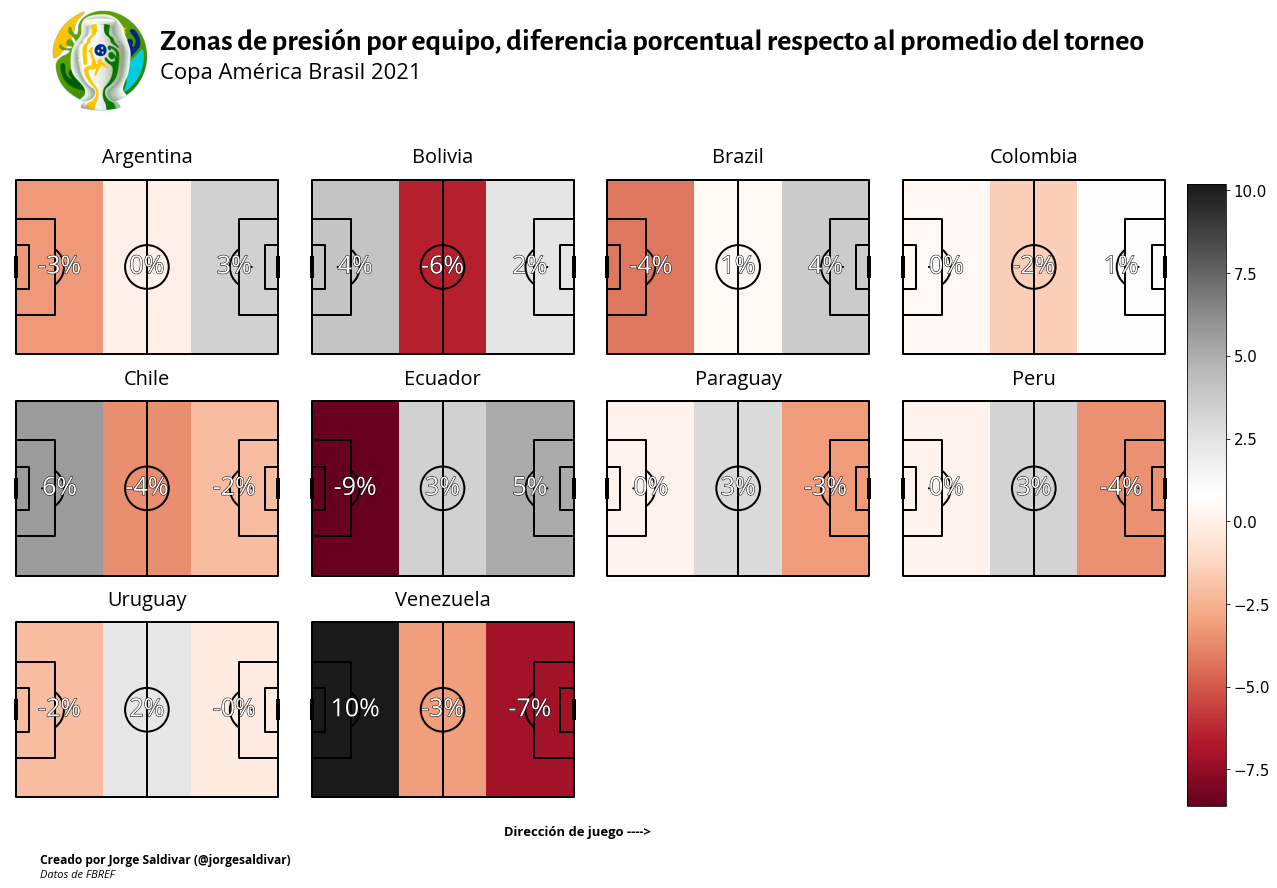

In [82]:
pressure_cols = ['diff_def 3rd', 'diff_mid 3rd', 'diff_att 3rd']

title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "black"
background = "white"
filler = "grey"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

path_eff = [path_effects.Stroke(linewidth=1, foreground='black'),
            path_effects.Normal()]

# setup a mplsoccer pitch
pitch = Pitch(line_zorder=2, line_color='black', pad_top=10)

# mplsoccer calculates the binned statistics usually from raw locations, such as pressure events
# for this example we will create a binned statistic dividing
# the pitch into thirds for one point (0, 0)
# we will fill this in a loop later with each team's statistics from the dataframe
bin_statistic = pitch.bin_statistic([0], [0], statistic='count', bins=(3, 1))

GRID_HEIGHT = 0.9
CBAR_WIDTH = 0.03
fig, axs = pitch.grid(nrows=3, ncols=4, figheight=(10),
                      # leaves some space on the right hand side for the colorbar
                      grid_width=0.88, left=0.025,
                      endnote_height=0.03, endnote_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      title_space=0.01, title_height=0.04, grid_height=GRID_HEIGHT)
fig.set_facecolor('white')

teams = countries
vmin = pressing_zones_by_team[pressure_cols].min().min() * 100 # normalise the heatmaps with the min / max values
vmax = pressing_zones_by_team[pressure_cols].max().max() * 100

for i, ax in enumerate(axs['pitch'].flat[:len(teams)]):
    # the top of the StatsBomb pitch is zero
    # plot the title half way between zero and -20 (the top padding)
    ax.text(60, -10, teams[i].title(), ha='center', va='center', fontsize=20, font=body_font)

    # fill in the bin statistics from df and plot the heatmap
    bin_statistic['statistic'] = pressing_zones_by_team.loc[pressing_zones_by_team.country == teams[i], 
                                                            pressure_cols].values * 100
    heatmap = pitch.heatmap(bin_statistic, ax=ax, cmap='RdGy', vmin=vmin, vmax=vmax)
    annotate = pitch.label_heatmap(bin_statistic, color='white', fontsize=25, ax=ax,
                                   str_format='{0:.0f}%', ha='center', va='center', 
                                   font=body_font, path_effects=path_eff)

# Remove the two spare pitches
if len(teams) == 10:
    for ax in axs['pitch'][-1, 2:]:
        ax.remove()
    
# add cbar axes
cbar_bottom = axs['pitch'][-1, 0].get_position().y0
cbar_left = axs['pitch'][0, -1].get_position().x1 + 0.01
ax_cbar = fig.add_axes((cbar_left, cbar_bottom, CBAR_WIDTH,
                        # take a little bit off the height because of padding
                        GRID_HEIGHT - 0.036))
cbar = plt.colorbar(heatmap, cax=ax_cbar)
for label in cbar.ax.get_yticklabels():
    #label.set_fontproperties(fm.prop)
    label.set_fontsize(15)

## add title
fig.text(0.14,1.09,"Zonas de presión por equipo, diferencia porcentual respecto al promedio del torneo",
         fontweight="bold", fontsize=30,fontfamily=title_font, color=text_color)
fig.text(0.14,1.05,"Copa América Brasil 2021",fontweight="regular", fontsize=22,fontfamily=body_font, 
         color=text_color)

## add logo
ax2 = fig.add_axes([0.02,1,0.15,0.15]) # badge
ax2.axis("off")
img = Image.open("imgs/Brasil2021ca.png")
ax2.imshow(img)
    
## add footer
s = "Dirección de juego ---->"
fig.text(0.4, -0.0005, s, fontweight="bold", fontsize=13, fontfamily=body_font, color=text_color)

s = "Creado por Jorge Saldivar (@jorgesaldivar)"
fig.text(0.05, -0.04, s, fontweight="bold", fontsize=12, fontfamily=body_font, color=text_color)
s = "Datos de FBREF"
fig.text(0.05, -0.06, s, fontstyle="italic",fontsize=11, fontfamily=body_font, color=text_color)

plt.tight_layout()
plt.savefig("outputs/pressing_zones_per_diff.png", bbox_inches="tight", dpi=300)
plt.show()